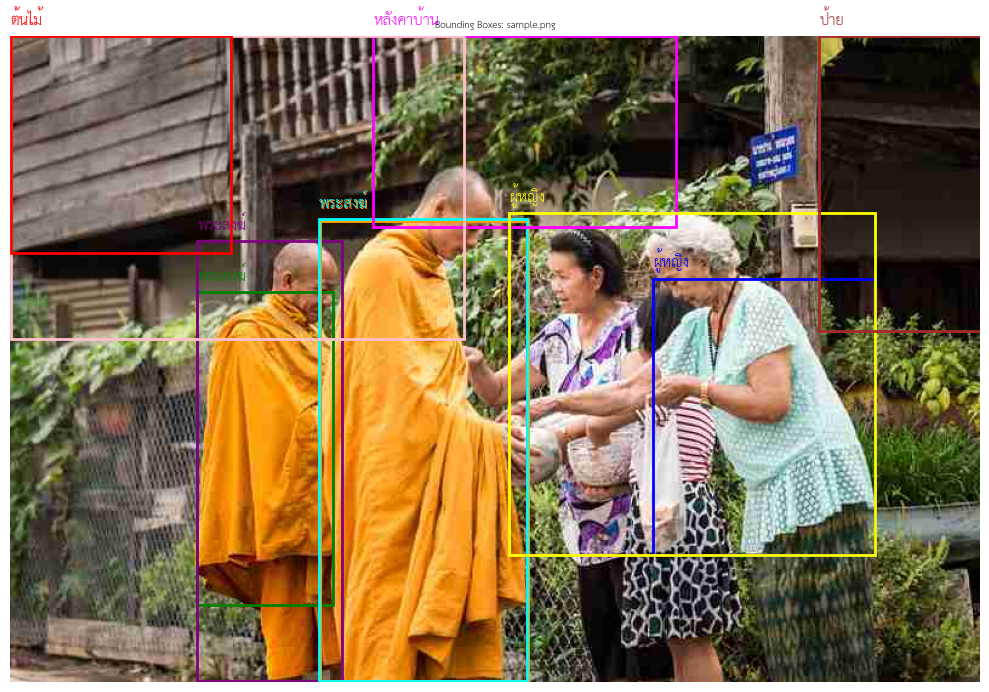

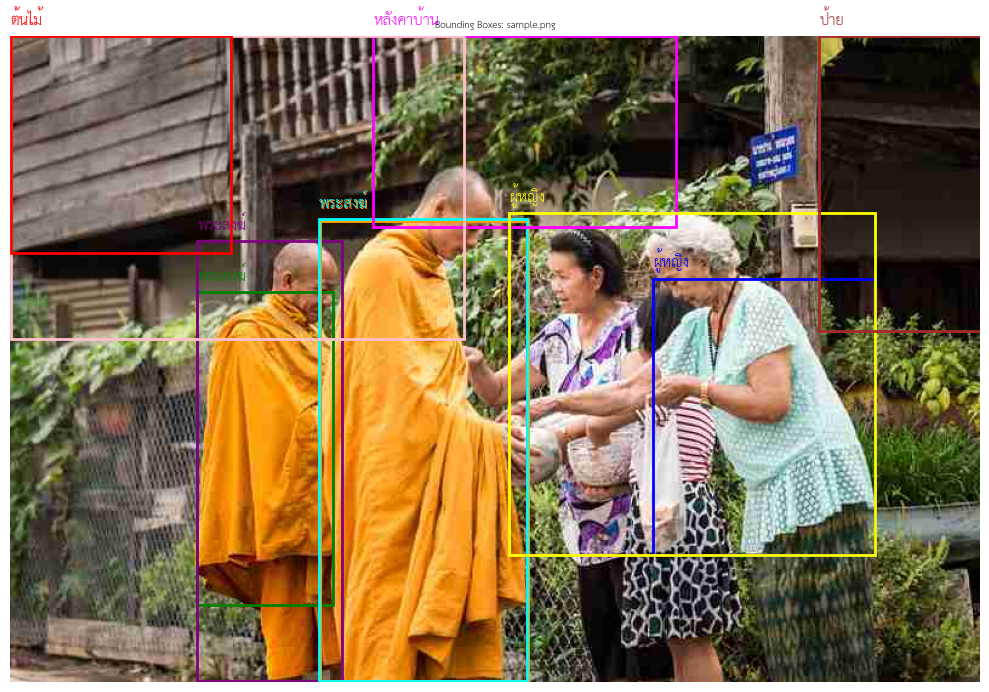

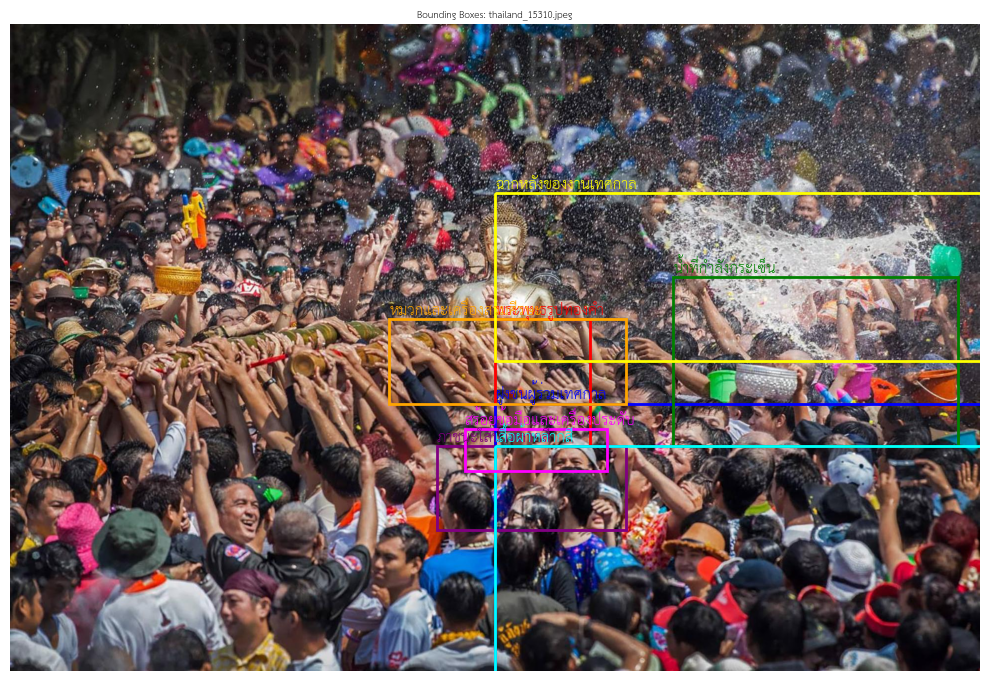

In [ ]:
import json
import matplotlib.pyplot as plt
from PIL import Image
from typing import List
import matplotlib.font_manager as fm

font_path = "fonts/THSarabunNew.ttf"
try:
    font_prop = fm.FontProperties(fname=font_path, weight='extra bold')
except Exception as e:
    print(f"Font not found or failed to load at {font_path}. Falling back to default font. Error: {e}")
    font_prop = fm.FontProperties(family="sans-serif")

def visualize_scene_graph_bounding_boxes(
    image_path: str,
    scene_graph_path: str,
    scene_key: str = 'second',
    figsize: tuple = (10, 7)
) -> plt.Figure:
    """
    Visualize bounding boxes from a scene graph on an image.
    """
    try:
        with open(scene_graph_path, 'r', encoding='utf-8') as f:
            scene_graph = json.load(f)
        img = Image.open(image_path)
        original_width, original_height = img.size
    except FileNotFoundError as e:
        print(f"Error: {e}")
        return None
    except json.JSONDecodeError:
        print(f"Error: Invalid JSON in {scene_graph_path}")
        return None

    # Check if scene_key exists, if not use the root dictionary
    if scene_key in scene_graph:
        scene = scene_graph[scene_key]
    else:
        scene = scene_graph
    
    try:
        scene_width, scene_height = scene['width'], scene['height']
    except KeyError:
        print(f"Error: 'width' or 'height' not found in scene graph")
        return None
    
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown', 'pink']
    scale_coord = lambda x, orig, target: x * (target / orig)

    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img)

    for idx, (obj_id, obj) in enumerate(scene['objects'].items()):
        # Scale coordinates from scene graph to image dimensions
        x = scale_coord(obj['x'], scene_width, original_width)
        y = scale_coord(obj['y'], scene_height, original_height)
        w = scale_coord(obj['w'], scene_width, original_width)
        h = scale_coord(obj['h'], scene_height, original_height)
        
        # Assume (x, y) is the top-left corner of the bounding box
        color = colors[idx % len(colors)]
        rect = plt.Rectangle((x, y), w, h, fill=False, edgecolor=color, linewidth=2)
        ax.add_patch(rect)
        
        # Place label above the bounding box
        ax.text(x, y - 10, obj['name'], color=color, fontsize=16, fontproperties=font_prop, fontweight='bold')
    
    ax.set_title(f'Bounding Boxes: {image_path.split("/")[-1]}', fontproperties=font_prop)
    ax.axis('off')
    plt.tight_layout()
    return fig


def visualize_multiple_images(image_scene_pairs: List[tuple]):
    """Visualizes bounding boxes for multiple images."""
    for image_path, scene_graph_path in image_scene_pairs:
        fig = visualize_scene_graph_bounding_boxes(image_path, scene_graph_path)
        if fig:
            plt.show()

if __name__ == '__main__':
    image_scene_pairs = [
        ('data/sam/sample.png', 'data/sam/sample.json'),
        ('data/sam/sample.png', 'data/sam/sample_fix_bboxes.json'),
        ('data/sea-vqa/thailand/thailand_15310.jpeg', 'data/sea-vqa/thailand/thailand_15310_thai_image_scene_graph_claudesonnet3.7.json'),
        # ('data/sea-vqa/thailand/thailand_15310.jpeg', 'data/sea-vqa/thailand/thailand_15310_thai_image_scene_graph_gemini2.0flash.json'),
        # ('data/sea-vqa/thailand/thailand_15309.jpeg', 'data/sea-vqa/thailand/thailand_15309_thai_image_scene_graph_claudesonnet3.7.json'),
        # ('data/sea-vqa/thailand/thailand_15309.jpeg', 'data/sea-vqa/thailand/thailand_15309_thai_image_scene_graph_gemini2.0flash.json'),
        # ('data/sea-vqa/thailand/thailand_12435.jpeg', 'data/sea-vqa/thailand/thailand_12435_thai_image_scene_graph_gemini2.0flash.json'),
        # ('data/sea-vqa/thailand/thailand_14181.jpeg', 'data/sea-vqa/thailand/thailand_14181_thai_image_scene_graph_gemini2.0flash.json'),
        # ('data/sea-vl/crocodile.png', 'data/sea-vl/crocodile.json'),
        # ('data/sea-vl/noodle.png', 'data/sea-vl/noodle_annotated.json'),
        # ('data/sea-vl/phuket.png', 'data/sea-vl/phuket_annotated.json'),
        # ('data/sea-vl/temple_roof.png', 'data/sea-vl/temple_roof_annotated.json'),
        # ('data/sea-vl/kinnari.png', 'data/sea-vl/kinnari_annotated.json'),
        # ('data/sea-vl/krapao.png', 'data/sea-vl/krapao_annotated.json'),
        # ('data/sea-vl/royal_barge.png', 'data/sea-vl/royal_barge_annotated.json'),
        # ('data/sea-vl/spirit_house.png', 'data/sea-vl/spirit_house_annotated.json'),
    ]
    visualize_multiple_images(image_scene_pairs)